<a href="https://colab.research.google.com/github/ChrisMath26/Fisica-Computacional/blob/main/Soluci%C3%B3n%20Edos/EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Un circuito electrónico que sirve para filtrar señales se muestra a continuación

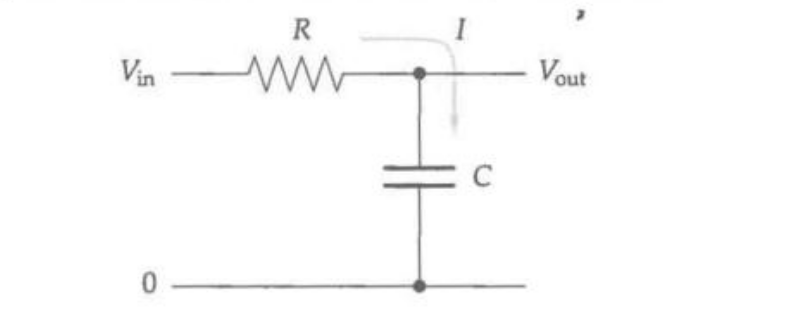

Usando la ley de Ohm, la ley de capacitor y asumiendo que la salida tiene alta impedancia de tal forma que muy poca corriente fluye hacia la salida, se puede escribir el sistema de ecuaciones que rige el circuito así:

Sea $I$ la corriente que fluye a través de $R$ y por el capacitor con capacitancia $C$, y sea $Q$ la carga del capacitor, entonces

$$
IR = V_{in}-V_{out}; \quad Q = CV_{out}; \quad I = \frac{dQ}{dt}
$$

Substituyendo la segunda en la tercera ecuación e insertando en la primera se obtiene

$$
\frac{dV_{out}}{dt}=\frac{1}{RC}(V_{in}-V_{out})
$$

Escriba un programa que resuelva la Eq. diferencial asumiendo que la señal de entrada es una onda cuadrada de frecuencia 1 y amplitud 1, es decir:

$$
V_{in} = \left\{\begin{array}{ll}
    1, & \text{si } \lfloor 2t \rfloor \text{ par}\\
    -1, & \text{si } \lfloor 2t \rfloor \text{ impar}\\
\end{array}\right\}
$$

Use el programa para hacer gráficas de la salida del filtro desde $t=0$ hasta $t=10$ cuando $RC = 0.01$ $0.1$ y $1$ con condición inicial $V_{out}(0) = 0$

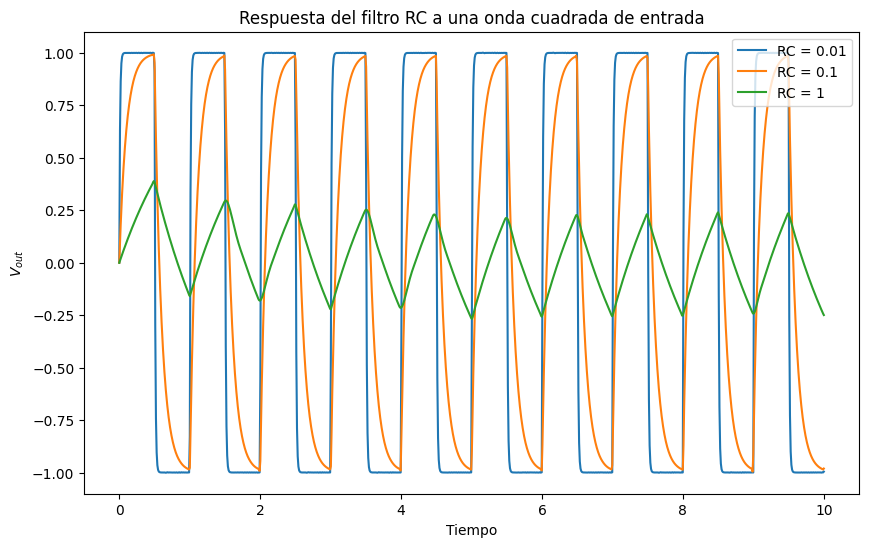

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir la ecuación diferencial
def filtro(t, y, RC):
    Vin = 1 if int(2 * t) % 2 == 0 else -1 #definición de la funcion a tramos
    dVoutdt = (Vin - y) / (RC)
    return dVoutdt

# Condiciones iniciales y tiempo de integración
Vout0 = [0]
t_span = (0, 10)

# Valores de RC a probar
RC_val = [0.01, 0.1, 1]

# Graficar la salida del filtro para diferentes valores de RC
plt.figure(figsize=(10, 6))

for i in range(0,len(RC_val)):
    RC=RC_val[i]
    sol = solve_ivp(filtro, t_span, Vout0, args=(RC,), t_eval=np.linspace(t_span[0], t_span[1], 1000))
    plt.plot(sol.t, sol.y[0], label=f'RC = {RC}')

plt.xlabel('Tiempo')
plt.ylabel('$V_{out}$')
plt.legend()
plt.title('Respuesta del filtro RC a una onda cuadrada de entrada')
plt.show()



Las ecuaciones de Lotka-Volterra son un modelo matemático de interacción entre depredadores y presas en especies biológicas. Sean dos variables $x$ e $y$ el tamaño de dos especies $x$: Presa (conejos) y $y$: Depredador (zorros). En el modelo de Lotka-Volterra los conejos se reproducen a una tasa proporcional a su población pero son comidos por los zorros a una tasa proporcional a la población de zorros y conejos. En término matemáticos

$$
\frac{dx}{dt}=\alpha x - \beta x y
$$

donde $\alpha$ y $\beta$ son constantes. A su vez, los zorros se reproducen a la tasa a la que comen conejos y mueren por vejez a una tasa proporcional a su población, esto es:

$$
\frac{dy}{dt}=\gamma xy - \delta y
$$

donde $\gamma$ y $\delta$ son constantes.

Escriba un programa que resuelva estas ecuaciones usando $\alpha = 1$, $\beta = \gamma = 0.5$ y $\delta = 2$, asumiendo $x(0)=y(0)=2$. Describa en palabras lo que observa en la simulación

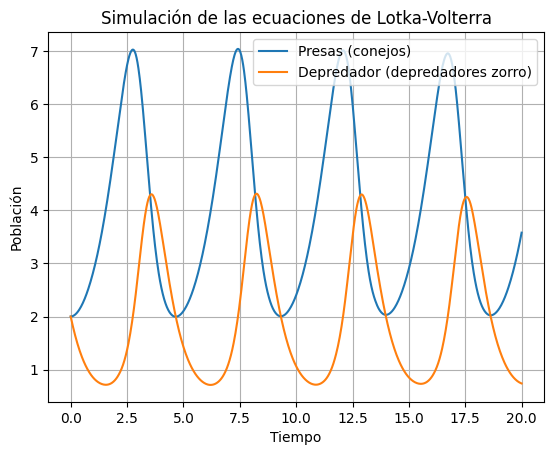

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt
def LodkaVolterra (t,xy,alpha,beta,gamma,delta):
  x,y=xy
  return [alpha*x-beta*x*y, -delta*y+gamma*x*y]
#constantes del problema
alpha=1
beta=0.5
gamma=0.5
delta=2

#Condiciones iniciales
cond_in=[2, 2]

# Tiempo de integración
tspam=(0,20)
t=np.linspace(tspam[0],tspam[1],1000)
# Resolver las ecuaciones utilizando solve_ivp
sol=solve_ivp(LodkaVolterra,tspam,cond_in,args=(alpha,beta,gamma,delta),t_eval=np.linspace(tspam[0],tspam[1],1000))

#Gráfico de los resultados
plt.plot(sol.t, sol.y[0],label='Presas (conejos)')
plt.plot(sol.t, sol.y[1],label='Depredadores (depredadores zorro)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.title('Simulación de las ecuaciones de Lotka-Volterra')
plt.grid()
plt.show()


Las poblaciones de presas y depredadores tienden a estar en fases alternadas. Cuando la población de presas aumenta, la población de depredadores también tiende a aumentar en respuesta. A medida que la población de depredadores aumenta, la de presas disminuye, y este ciclo se repite. Además,se nota que hay un efecto retardado entre las respuestas de las poblaciones de presas y depredadores. Cuando la población de presas aumenta, lleva un tiempo antes de que la población de depredadores responda con un aumento, y viceversa.